In [1]:
# 한글 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from dotenv import load_dotenv

print(load_dotenv())

False


In [4]:
!kaggle datasets download prachi13/customer-analytics

Dataset URL: https://www.kaggle.com/datasets/prachi13/customer-analytics
License(s): other




  0%|          | 0.00/121k [00:00<?, ?B/s]
100%|██████████| 121k/121k [00:00<00:00, 40.9MB/s]


In [5]:
import zipfile

HOME = os.getcwd()

zip_file_path = os.path.join(HOME,'customer-analytics.zip')
extract_to_path = os.path.join(HOME,'data')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print(f"압축 해제 완료: {extract_to_path}")
# 해제된 파일 목록 확인
print("현재 폴더 파일 목록:", os.listdir(extract_to_path))

압축 해제 완료: c:\Users\User\github\DataScience\Ecom_Shipping\데이터 분석\data
현재 폴더 파일 목록: ['Train.csv']


데이터셋 불러오기

In [6]:
HOME = os.getcwd()

df_csv= os.path.join(extract_to_path,'train.csv')

df = pd.read_csv(df_csv)

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**컬럼 소개 (California Housing Dataset)**

행의 수 : 10999 <br>
컬럼 수 : 12 

* **ID**: 고객 ID 번호
* **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)
* **Mode of shipment**: 배송 수단 (선박, 항공, 도로)
* **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수
* **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)
* **Cost of the product**: 제품 가격 (미국 달러 기준)
* **Prior purchases**: 이전 구매 횟수
* **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)
* **Gender**: 성별 (남성, 여성)
* **Discount offered**: 해당 제품에 제공된 할인액
* **Weight in gms**: 제품 무게 (그램 단위)
* **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

In [8]:
# Reached on time을 target으로 변경
df['target'] = df['Reached.on.Time_Y.N']
df = df.drop(columns=['Reached.on.Time_Y.N'])
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### 데이터 분석

#### **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

In [9]:
df['target'].value_counts()

target
1    6563
0    4436
Name: count, dtype: int64

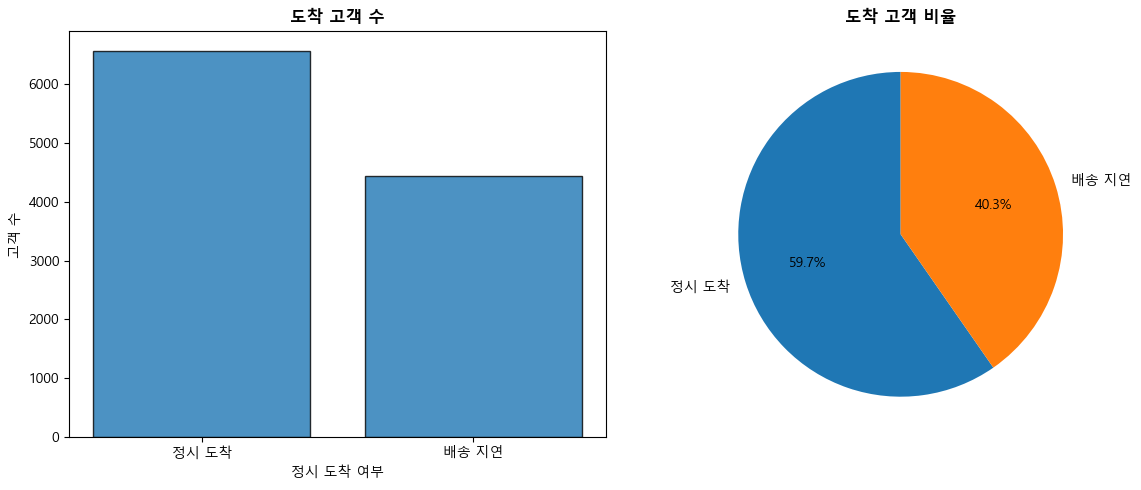

In [10]:
class_counts = df['target'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 막대 그래프
axes[0].bar([0,1], class_counts.values, edgecolor='black', alpha=0.8)
axes[0].set_title('도착 고객 수', fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['정시 도착', '배송 지연'] )
axes[0].set_xlabel('정시 도착 여부')
axes[0].set_ylabel('고객 수')

# 파이 차트
m_labels = ['정시 도착', '배송 지연']
axes[1].pie(class_counts.values, labels=m_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('도착 고객 비율', fontweight='bold')
plt.tight_layout()
plt.show()

#### **ID**: 고객 ID 번호

In [11]:
print(f"중복되지 않은 데이터 수: {df['ID'].nunique()}")
print("중복된 데이터 수:", df['ID'].duplicated().sum())
print("중복된 데이터가 많아서 ID 삭제")

중복되지 않은 데이터 수: 10999
중복된 데이터 수: 0
중복된 데이터가 많아서 ID 삭제


#### **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)

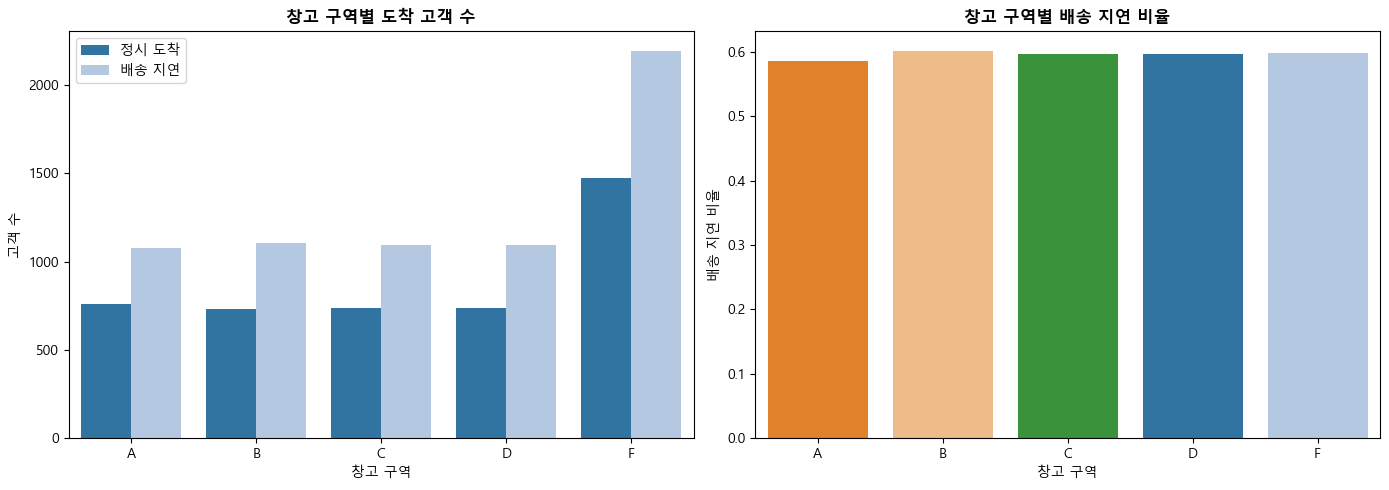

In [12]:
sorted_warehouse = sorted(df['Warehouse_block'].unique())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Warehouse_block', hue='target', data=df, order=sorted_warehouse, palette='tab20', ax=axes[0])
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_title('창고 구역별 도착 고객 수', fontweight='bold')
axes[0].set_xlabel('창고 구역')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Warehouse_block', y='target', data=df, order=sorted_warehouse, palette='tab20', hue='Warehouse_block', errorbar=None, ax=axes[1])
axes[1].set_title('창고 구역별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('창고 구역')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Mode of shipment**: 배송 수단 (선박, 항공, 도로)

In [13]:
df['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

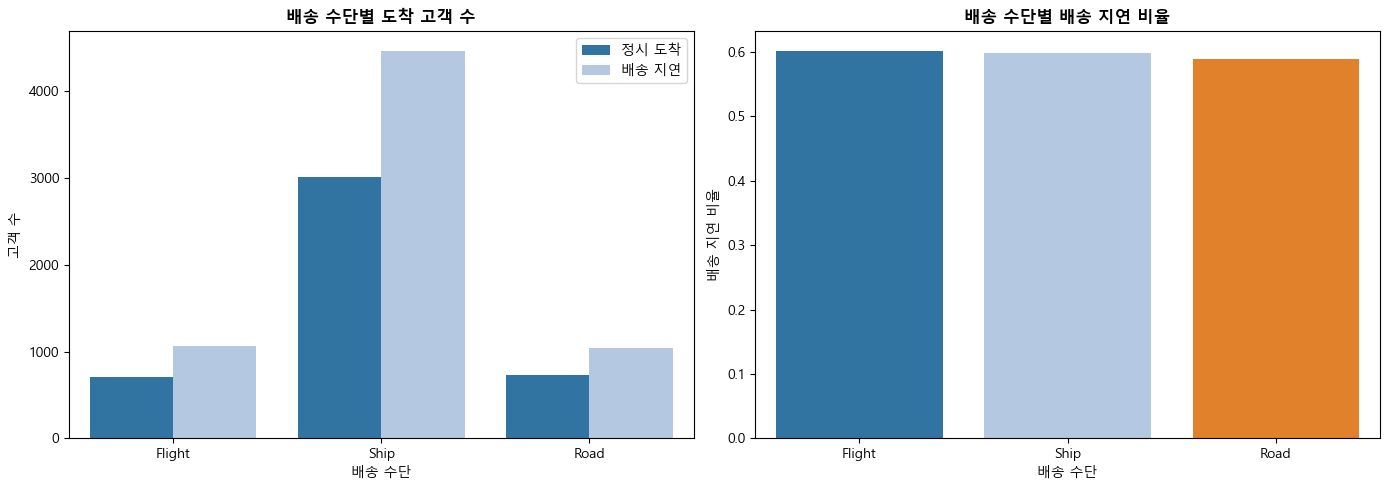

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Mode_of_Shipment', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('배송 수단별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('배송 수단')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Mode_of_Shipment', y='target', data=df, palette='tab20', hue='Mode_of_Shipment', errorbar=None, ax=axes[1])
axes[1].set_title('배송 수단별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('배송 수단')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수

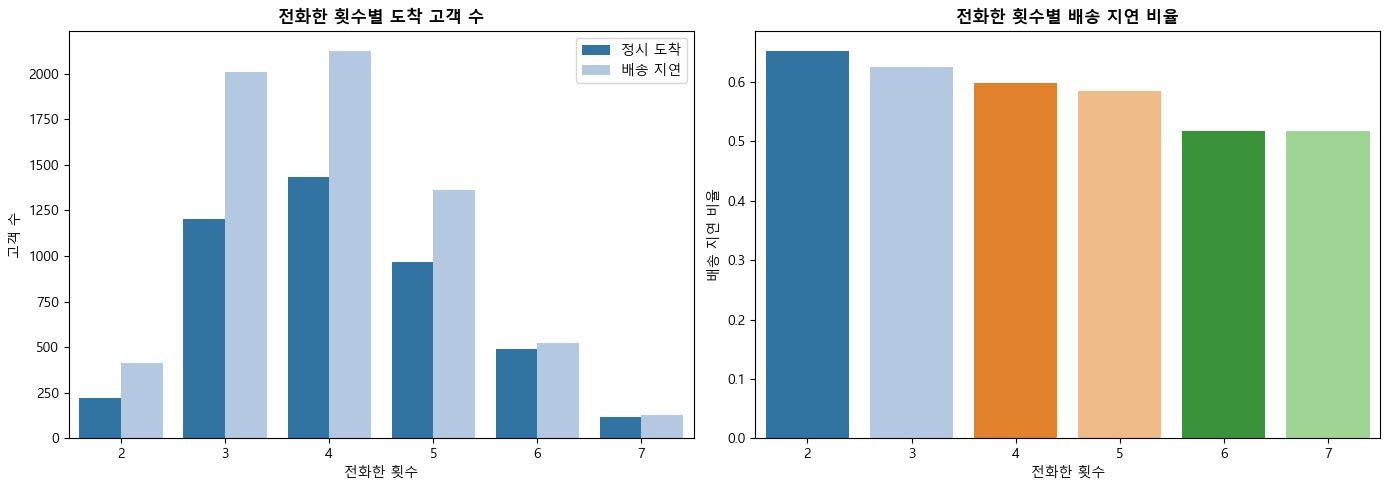

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_care_calls', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('전화한 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('전화한 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_care_calls', y='target', data=df, palette='tab20', hue='Customer_care_calls', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('전화한 횟수별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('전화한 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)

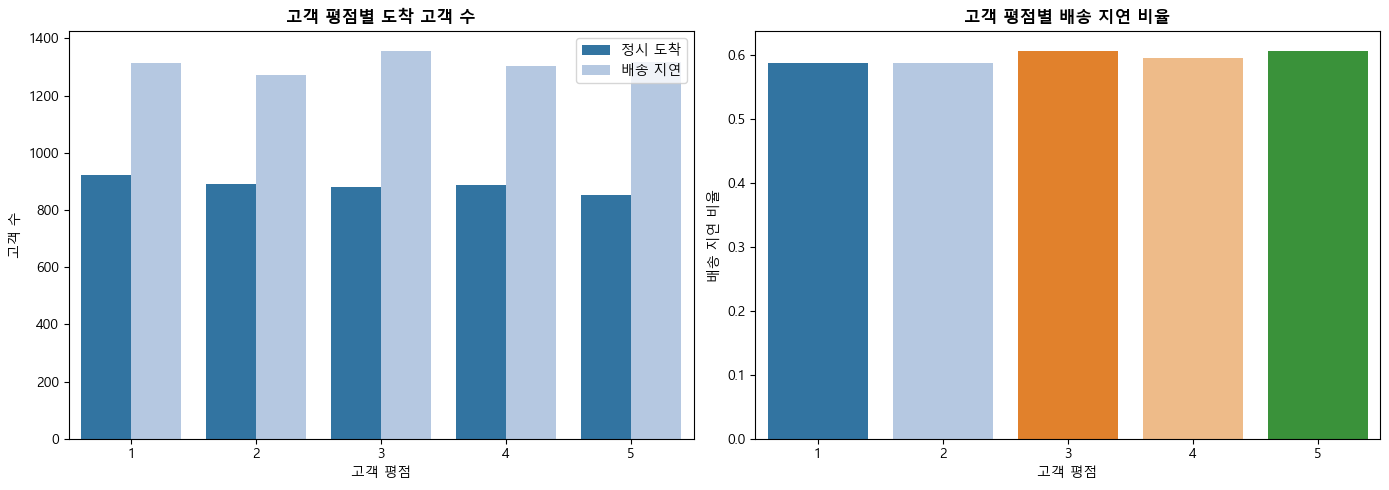

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_rating', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('고객 평점별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('고객 평점')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_rating', y='target', data=df, palette='tab20', hue='Customer_rating', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('고객 평점별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('고객 평점')
axes[1].set_ylabel('배송 지연 비율')
plt.tight_layout()
plt.show()

#### **Cost of the product**: 제품 가격 (미국 달러 기준)

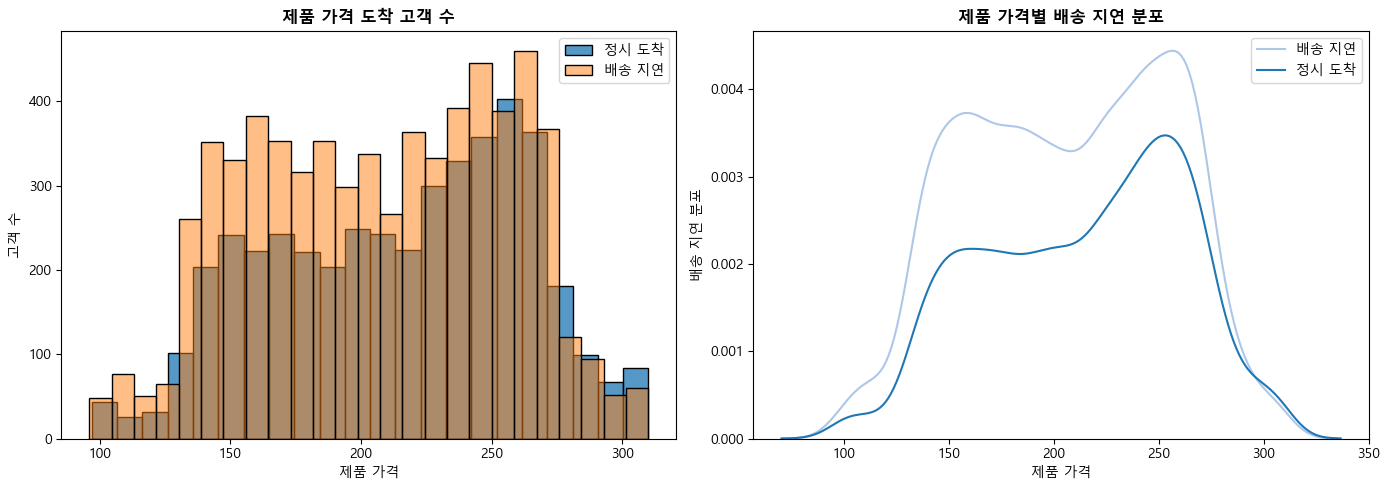

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Cost_of_the_Product'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Cost_of_the_Product'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 가격 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 가격')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Cost_of_the_Product', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 가격별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 가격')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

#### **Prior purchases**: 이전 구매 횟수

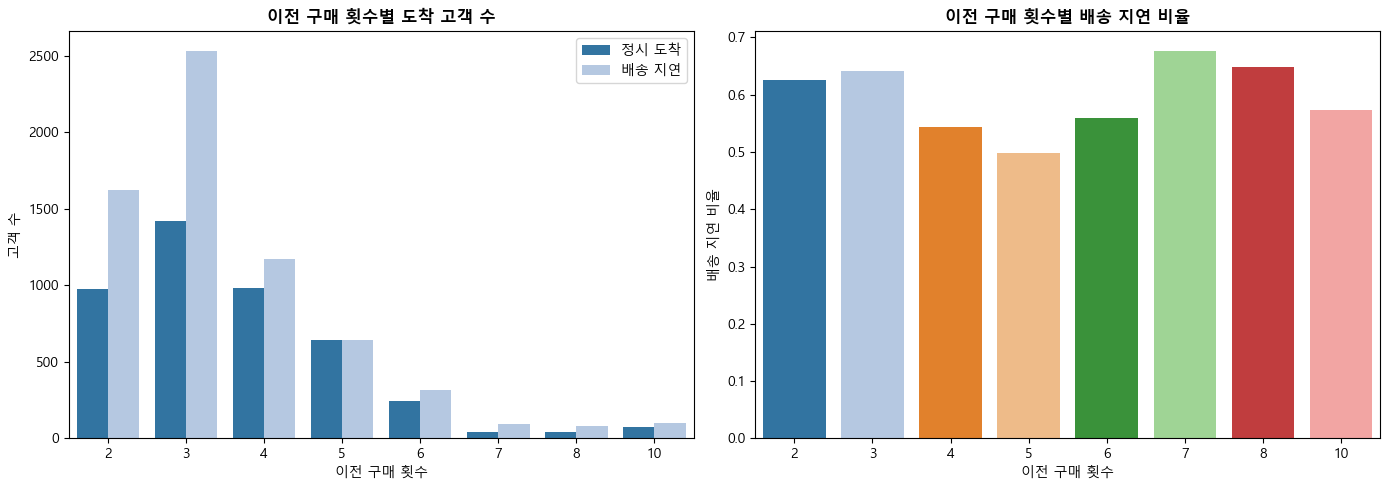

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Prior_purchases', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('이전 구매 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('이전 구매 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Prior_purchases', y='target', data=df, palette='tab20', hue='Prior_purchases', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('이전 구매 횟수별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('이전 구매 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)

In [19]:
df['Product_importance'].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

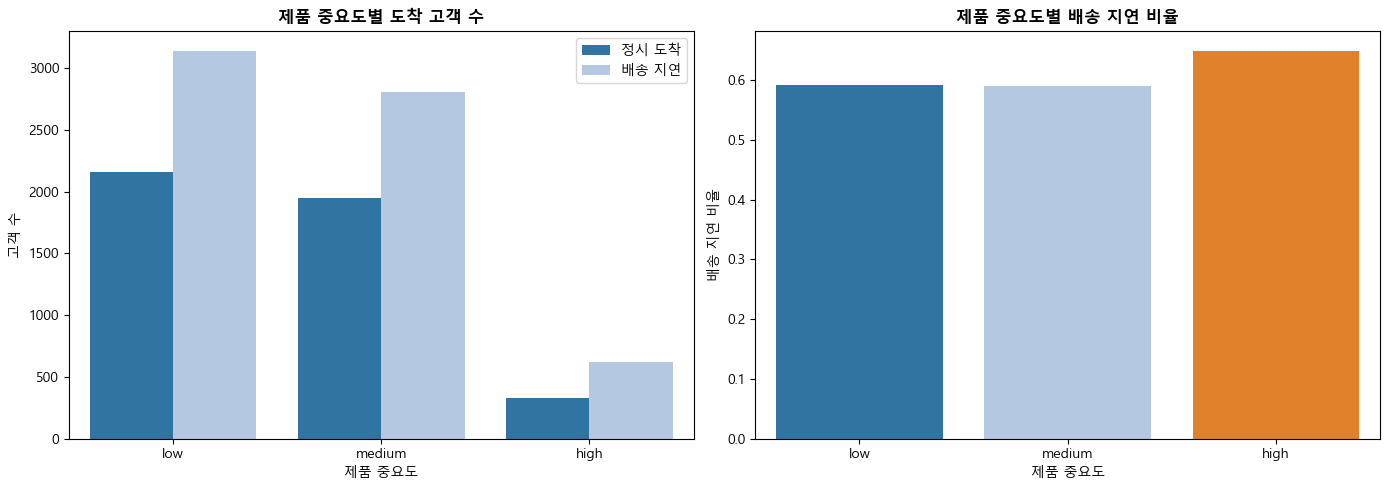

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Product_importance', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('제품 중요도별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 중요도')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Product_importance', y='target', data=df, palette='tab20', hue='Product_importance', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('제품 중요도별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('제품 중요도')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Gender**: 성별 (남성, 여성)

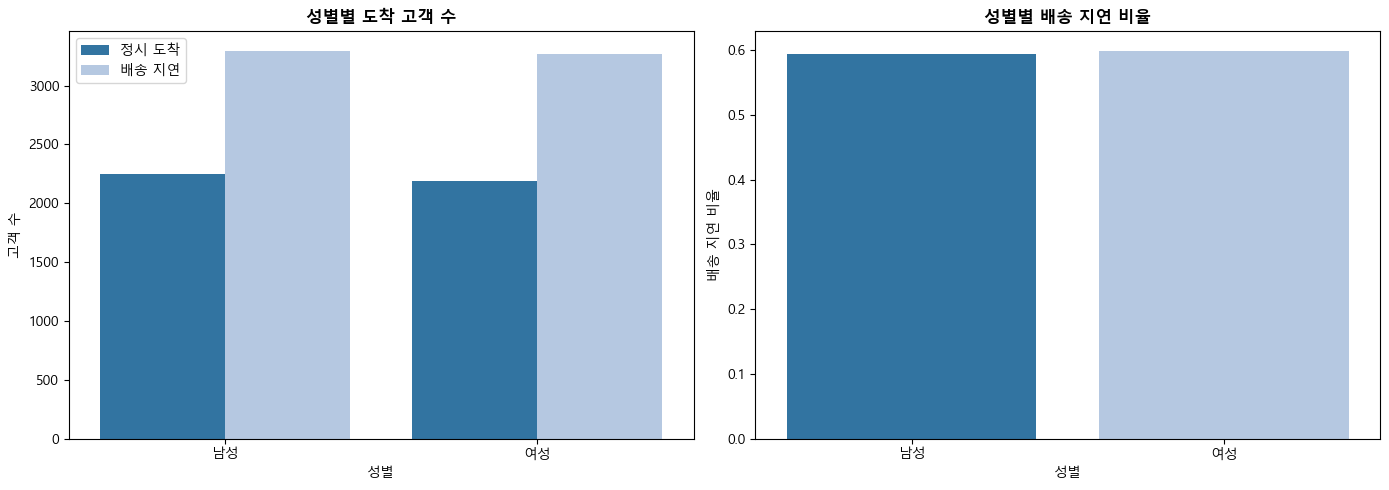

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Gender', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('성별별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['남성', '여성'])
axes[0].set_xlabel('성별')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Gender', y='target', data=df, palette='tab20', hue='Gender', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('성별별 배송 지연 비율', fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['남성', '여성'])
axes[1].set_xlabel('성별')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

### **Discount offered**: 해당 제품에 제공된 할인액

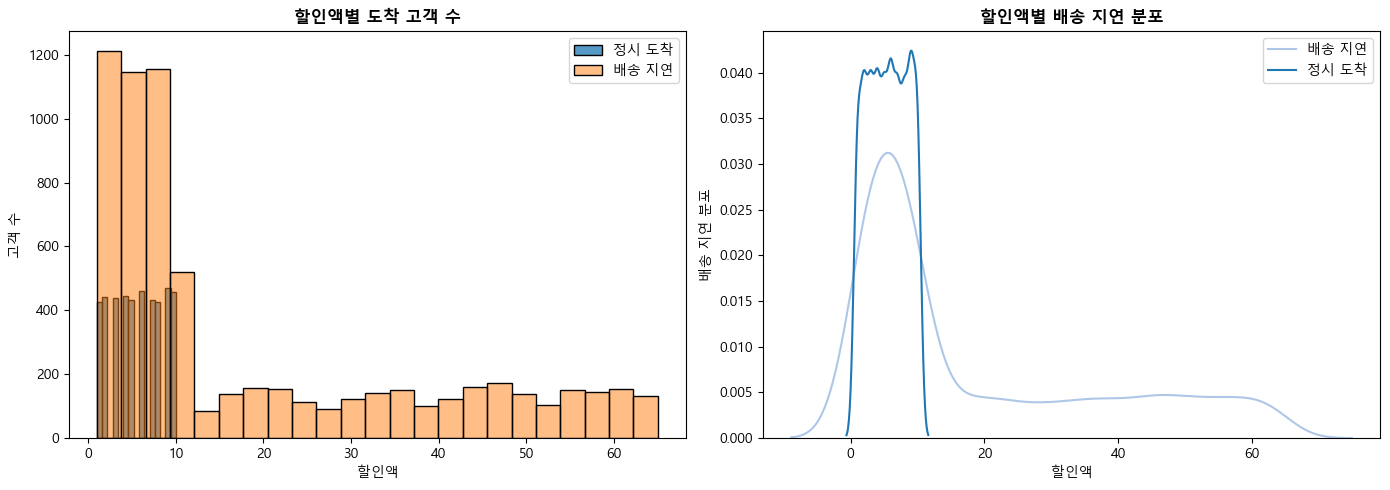

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Discount_offered'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Discount_offered'], ax=axes[0], alpha=0.5)
axes[0].set_title('할인액별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('할인액')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Discount_offered', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('할인액별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('할인액')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

### **Weight in gms**: 제품 무게 (그램 단위)

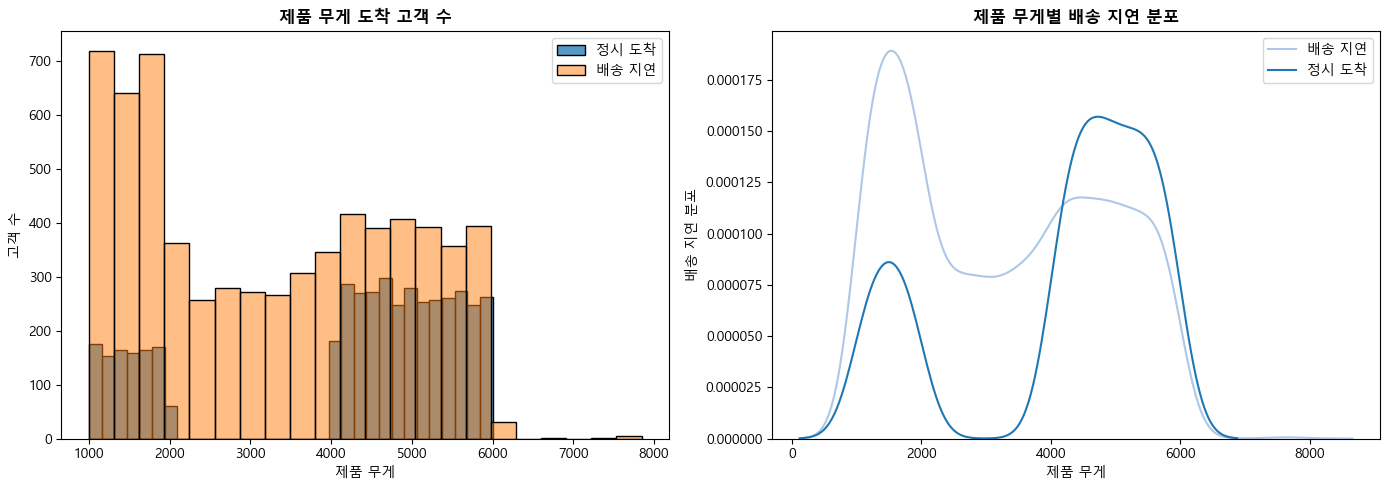

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Weight_in_gms'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Weight_in_gms'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 무게 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 무게')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Weight_in_gms', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 무게별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 무게')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

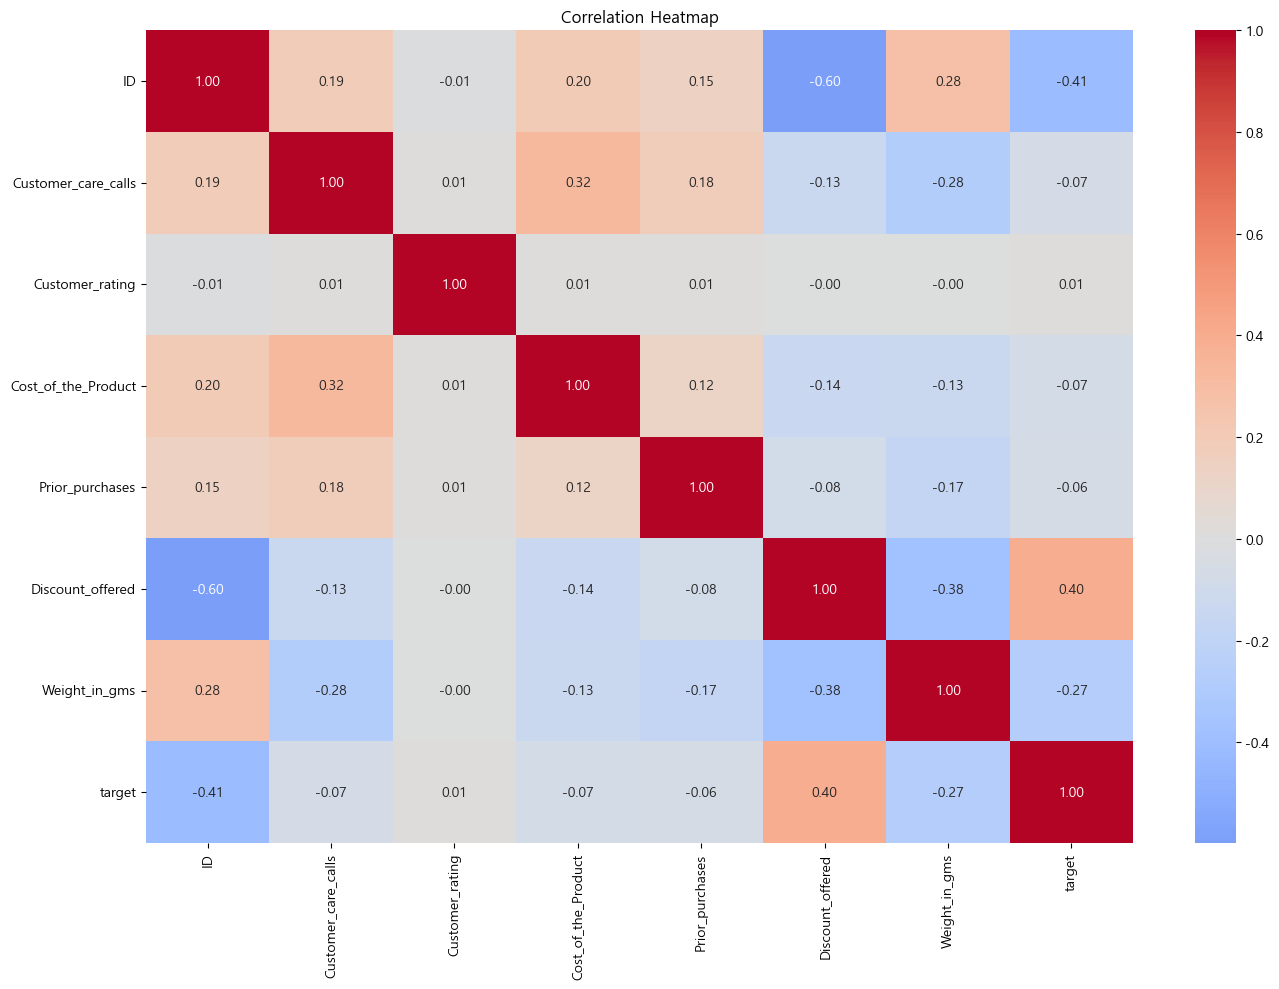

In [24]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']).corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### 피처 엔지니어링 (Feature Engineering) 단계
#### 1️⃣ 가격 기반 피처 (Price-Based Features)
Price_per_Rating (평점 대비 가격): 고객 만족도 대비 비용 효율성(가성비)을 나타냅니다.

Discount_Weight_Ratio (무게 대비 할인 비중): 화물 무게와 할인 금액 간의 관계를 분석합니다.

Price_Discount_Interaction (가격-할인 상호작용): 가격과 할인액의 곱을 통해 두 변수가 결합되었을 때의 시너지 효과를 포착합니다.

#### 2️⃣ 물류 관련 피처 (Logistics Features)
Calls_per_Day (주문당 고객 센터 문의): 구매 횟수 대비 고객 센터 전화량으로, 고객의 민감도나 서비스 강도를 측정합니다.

Weight_Category (무게 범주화): 연속적인 무게 데이터를 가벼움, 보통, 무거움, 매우 무거움의 4개 구간으로 나눕니다.

#### 3️⃣ 고객 행동 피처 (Customer Behavior Features)
High_Value_Customer (우수 고객): 빈번하게 구매하는 고객을 식별하는 이진(0 또는 1) 플래그입니다.

Rating_Category (만족도 범주): 고객 평점을 바탕으로 만족도 수준을 단계별로 분류합니다.

High_Discount (고액 할인): 평균보다 높은 파격 할인이 적용되었는지 여부를 나타냅니다.

Discount_Rate (할인율): 제품 가격 대비 할인이 차지하는 비율을 계산합니다.


🔥 반드시 사용

Weight_Category (무게 범주화): 연속적인 무게 데이터를 가벼움, 보통, 무거움, 매우 무거움의 4개 구간으로 나눕니다.

Discount_Rate (할인율): 제품 가격 대비 할인이 차지하는 비율을 계산합니다.

High_Discount (고액 할인): 평균보다 높은 파격 할인이 적용되었는지 여부를 나타냅니다.

👍 강력 추천 추가

Discount_Weight_Ratio (무게 대비 할인 비중): 화물 무게와 할인 금액 간의 관계를 분석합니다.

🤔 필요하면만

Rating_Category (만족도 범주): 고객 평점을 바탕으로 만족도 수준을 단계별로 분류합니다.

High_Value_Customer (우수 고객): 빈번하게 구매하는 고객을 식별하는 이진(0 또는 1) 플래그입니다.

❌ 제거

Price_per_Rating (평점 대비 가격): 고객 만족도 대비 비용 효율성(가성비)을 나타냅니다.

Price_Discount_Interaction (가격-할인 상호작용): 가격과 할인액의 곱을 통해 두 변수가 결합되었을 때의 시너지 효과를 포착합니다.

Calls_per_Day (주문당 고객 센터 문의): 구매 횟수 대비 고객 센터 전화량으로, 고객의 민감도나 서비스 강도를 측정합니다.

https://www.kaggle.com/code/ibrahimongoren/e-commerce-shipment-delivery-prediction-analysis

In [25]:
# 1. 가격 기반 피처 (Price-based features)
# 공식: Price / (Rating + 1) -> 평점 대비 가격 (가성비 지표)
df['Price_per_Rating'] = df['Cost_of_the_Product'] / (df['Customer_rating'] + 1)

# 공식: Discount / (Weight + 1) -> 무게 대비 할인 비율 (물류 효율성 지표)
df['Discount_Weight_Ratio'] = df['Discount_offered'] / (df['Weight_in_gms'] + 1)

# 공식: Price * Discount -> 가격과 할인액의 상호작용 (고가제품 할인 시 수요 폭증 포착)
df['Price_Discount_Interaction'] = df['Cost_of_the_Product'] * df['Discount_offered']


# 2. 물류 및 운영 피처 (Logistics features)
# 공식: Care_Calls / (Prior_Purchases + 1) -> 고객의 주문당 문의 빈도 (배송 민감도)
df['Calls_per_Day'] = df['Customer_care_calls'] / (df['Prior_purchases'] + 1)

# 연속형 무게 데이터를 4개 등급(0~8kg)으로 범주화
df['Weight_Category'] = pd.cut(df['Weight_in_gms'], bins=[0, 2000,4000,8000], labels=['Low', 'Medium', 'High'])


# 3. 고객 행동 피처 (Customer behavior features)
# 이전 구매 횟수가 중앙값보다 높으면 1 (충성 고객 여부)
df['High_Value_Customer'] = (df['Prior_purchases'] > df['Prior_purchases'].median()).astype(int)

# 고객 평점을 불만족(0)에서 만족(3)까지 4단계로 그룹화
df['Rating_Category'] = pd.cut(df['Customer_rating'], 
                                         bins=[0, 2, 3, 4, 5], 
                                         labels=[0, 1, 2, 3])


# 4. 할인 특성 피처 (Discount features)
# 할인 금액이 중앙값보다 높으면 1 (파격 할인 여부)
df['High_Discount'] = (df['Discount_offered'] > df['Discount_offered'].median()).astype(int)

# 공식: Discount / (Price + 1) -> 제품 원가 대비 실제 할인율
df['Discount_Rate'] = df['Discount_offered'] / (df['Cost_of_the_Product'] + 1)

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include=['category']).columns.tolist()

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10999 non-null  int64  
 1   Warehouse_block             10999 non-null  object 
 2   Mode_of_Shipment            10999 non-null  object 
 3   Customer_care_calls         10999 non-null  int64  
 4   Customer_rating             10999 non-null  int64  
 5   Cost_of_the_Product         10999 non-null  int64  
 6   Prior_purchases             10999 non-null  int64  
 7   Product_importance          10999 non-null  object 
 8   Gender                      10999 non-null  object 
 9   Discount_offered            10999 non-null  int64  
 10  Weight_in_gms               10999 non-null  int64  
 11  target                      10999 non-null  int64  
 12  Price_per_Rating            10999 non-null  float64
 13  Discount_Weight_Ratio       109

In [27]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'target', 'Price_per_Rating', 'Discount_Weight_Ratio',
       'Price_Discount_Interaction', 'Calls_per_Day', 'Weight_Category',
       'High_Value_Customer', 'Rating_Category', 'High_Discount',
       'Discount_Rate'],
      dtype='object')

In [29]:
df = df.drop(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'], axis=1)

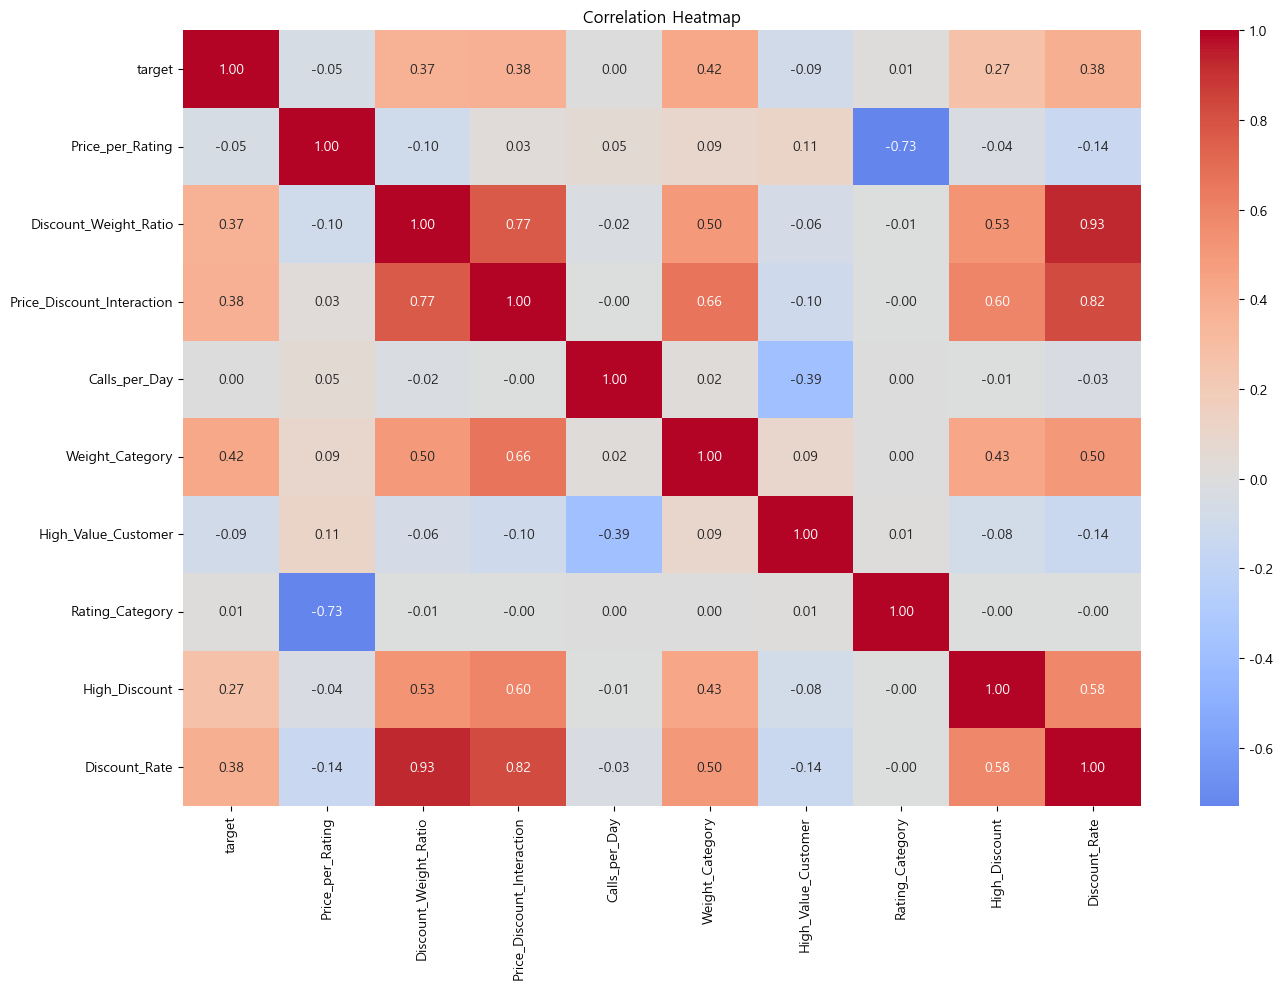

In [30]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
🔥 반드시 사용

Weight_Category (무게 범주화): 연속적인 무게 데이터를 가벼움, 보통, 무거움, 매우 무거움의 4개 구간으로 나눕니다.

Discount_Rate (할인율): 제품 가격 대비 할인이 차지하는 비율을 계산합니다.

High_Discount (고액 할인): 평균보다 높은 파격 할인이 적용되었는지 여부를 나타냅니다.

👍 강력 추천 추가

Discount_Weight_Ratio (무게 대비 할인 비중): 화물 무게와 할인 금액 간의 관계를 분석합니다.

🤔 필요하면만

Rating_Category (만족도 범주): 고객 평점을 바탕으로 만족도 수준을 단계별로 분류합니다.

High_Value_Customer (우수 고객): 빈번하게 구매하는 고객을 식별하는 이진(0 또는 1) 플래그입니다.

❌ 제거

Price_per_Rating (평점 대비 가격): 고객 만족도 대비 비용 효율성(가성비)을 나타냅니다.

Price_Discount_Interaction (가격-할인 상호작용): 가격과 할인액의 곱을 통해 두 변수가 결합되었을 때의 시너지 효과를 포착합니다.

Calls_per_Day (주문당 고객 센터 문의): 구매 횟수 대비 고객 센터 전화량으로, 고객의 민감도나 서비스 강도를 측정합니다.